In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML

In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

%matplotlib inline
plt.style.use('smandry')

# Bayesian classifier

In [4]:
# read data and print head
df = pd.read_csv('/Users/ando/andry/ML/courses/Statistics/Intro_to_Stat_learning/data/mixture.csv', index_col=0)
df.head(2)

,X1,X2,g2
1,2.526093,0.321050,0
2,0.366954,0.031462,0


In [5]:
clf = GaussianNB()
clf.fit(df[['X1','X2']], df['g2'])
xlim = [-2.7,3.9]
ylim = [-2.7,3.9]
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 40),
                     np.linspace(ylim[0], ylim[1], 40))
inputzz = np.c_[xx.ravel(), yy.ravel()]
Zout = clf.predict_proba(inputzz)
Z = Zout[:, 1].reshape(xx.shape)

# K-Nearest Neighbors

In [6]:
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh3.fit(df[['X1','X2']], df['g2'])
Zout3 = neigh3.predict_proba(inputzz)
Z3 = Zout3[:, 1].reshape(xx.shape)

neigh15 = KNeighborsClassifier(n_neighbors=15)
neigh15.fit(df[['X1','X2']], df['g2'])
Zout15 = neigh15.predict_proba(inputzz)
Z15 = Zout15[:, 1].reshape(xx.shape)

In [7]:
class knn(object):
    def __init__(self, X, y):
        self.train = X
        self.response = y
    def getNeighbors(self, test, k):
        test = np.array(test)
        dist=[]
        for train in self.train:
            dist.append(np.linalg.norm(test-train))
        argdist = np.argsort(dist)[:k]
        self.response[argdist]
        return Counter(self.response[argdist]).most_common(1)[0][0]
        #return(np.hstack((self.train[argdist], self.response[argdist].reshape(-1,1))))


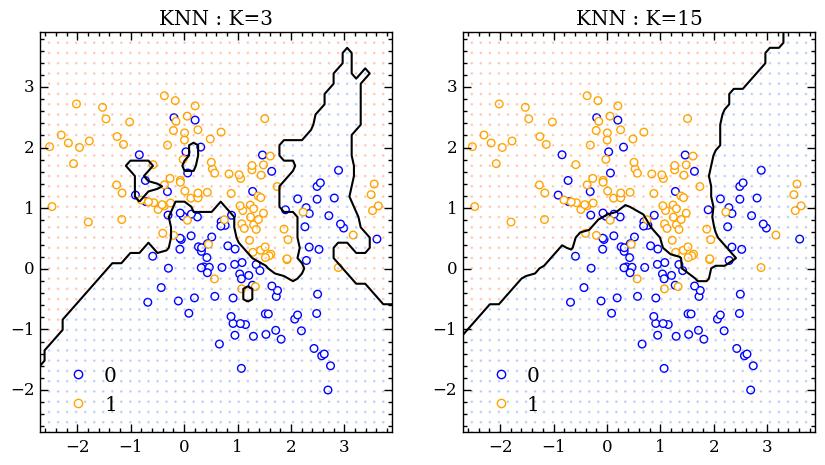

In [8]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
colors = {0:'blue', 1:'orange'}
pal = dict([(1,'orange'),(0,"blue")])

def plot_knn(Z,Zout, ax, title=None):
    ax.scatter(df.X1, df.X2, s=30, facecolors='w', edgecolors=df['g2'].apply(lambda x: colors[x]), label=[])
    markers = [plt.Line2D([0,0],[0,0], markeredgecolor=pal[key], linestyle='',
                          marker='o', ms=6, markerfacecolor='w', mew=1.0) for key in pal]
    ax.legend(markers, pal.keys(), numpoints=1, loc=3)
    ax.set_xlim([-2.7,3.9])
    ax.set_ylim([-2.7,3.9])
    ax.contour(xx, yy, Z, [0.5], colors='k')
    ax.scatter(inputzz[:,0], inputzz[:,1],s=1, alpha=0.3, color=["coral" if x >0.5 else "cornflowerblue" for x in Zout[:,1]])
    ax.set_title(title)
    
plot_knn(Z3,Zout3, ax1,title="KNN : K=3")
plot_knn(Z15,Zout15, ax2,title="KNN : K=15")
plt.show()